## 부스팅 (분류)

<b>분류의 경우</b>
> sklearn.ensemble.AdaBoostClassifier(base_estimator = None, n_estimators = 50, learning_rate=1.0)

base_estimator : 부스팅에서 수행할 분류기 (None이면 DecisionTreeClassifier/DecisionTreeRegressor를 수행)<br>
n_estimators : 부스팅이 종료되는 최대 분류기의 수 (int, default=50)

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

credit = pd.read_csv("C:/adp/data/credit_final.csv")
X = credit[credit.columns.difference(['credit.rating'])]
y = credit['credit.rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=321)
X_train.head()

,account.balance,age,apartment.type,bank.credits,credit.amount,credit.duration.months,credit.purpose,current.assets,dependents,employment.duration,foreign.worker,guarantor,installment.rate,marital.status,occupation,other.credits,previous.credit.payment.status,residence.duration,savings,telephone
133,3,26,2,1,1453,18,3,1,1,1,1,1,3,1,3,2,2,1,1,1
464,2,24,1,1,7472,12,4,1,1,1,1,1,1,1,1,2,2,2,4,1
919,1,46,3,2,6331,48,1,4,1,4,1,1,4,3,3,2,3,4,1,2
865,3,39,3,2,1271,15,3,4,1,2,1,1,3,3,3,2,3,4,4,2
352,3,46,2,2,7629,48,4,3,2,4,1,1,4,1,4,1,3,2,4,1


In [ ]:
# !pip install xgboost

In [4]:
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

adab = AdaBoostClassifier()
adab= adab.fit(X_train, y_train)

xgb = XGBClassifier(eval_metric='mlogloss',use_label_encoder=False) # use_label_encoder : 명목형 변수일경우 True / 수치형분수(0,1)은 False
xgb = xgb.fit(X_train, y_train)

y_pred_adab = adab.predict(X_test)
print("정확도 : ", adab.score(X_train, y_train))
print("정확도 : ", adab.score(X_test, y_test))
print("\n")

y_pred_xgb = xgb.predict(X_test)
print("정확도 : ", xgb.score(X_train, y_train))
print("정확도 : ", xgb.score(X_test, y_test))

정확도 :  0.7957142857142857
정확도 :  0.74


정확도 :  1.0
정확도 :  0.7433333333333333


In [5]:
adab.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [ ]:
## 조정을 해줄 수 있는 파라미터 : n_estimators, max_depth, learning_rate
xgb.get_params()

In [7]:
from sklearn.model_selection import GridSearchCV
import numpy as np 
param_grid = {'learning_rate':np.arange(0.5, 1.5, 0.1)}
model_grid_adaboost = GridSearchCV(AdaBoostClassifier(n_estimators=100), param_grid, cv=5)
model_grid_adaboost.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(n_estimators=100),
             param_grid={'learning_rate': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4])})

In [12]:
# param_grid = {'max_depth': [3,4,5],'learning_rate':np.arange(0.01, 0.1, 0.02)}
param_grid = {'max_depth': [3,4,5],'learning_rate':np.arange(0.01, 0.1, 0.01)}
model_grid_xgboost = GridSearchCV(XGBClassifier(eval_metric='mlogloss',use_label_encoder=False), param_grid, cv=5)
model_grid_xgboost.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     m

In [13]:
model_grid_adaboost.best_estimator_

AdaBoostClassifier(learning_rate=0.6, n_estimators=100)

In [14]:
model_grid_xgboost.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=4, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, ...)

In [16]:
print("AdaBoost")
print(model_grid_adaboost.best_estimator_.score(X_train,y_train))
print(model_grid_adaboost.best_estimator_.score(X_test,y_test))


print("\n")
print("XGBoost")
print(model_grid_xgboost.best_estimator_.score(X_train,y_train))
print(model_grid_xgboost.best_estimator_.score(X_test,y_test))

AdaBoost
0.8114285714285714
0.7466666666666667


XGBoost
0.8842857142857142
0.74


C:\Users\신주현\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


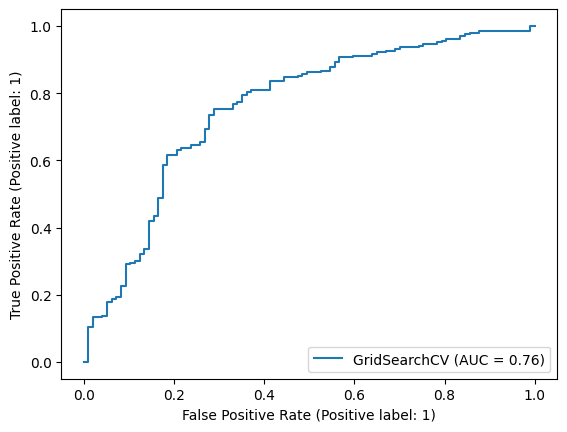

C:\Users\신주현\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


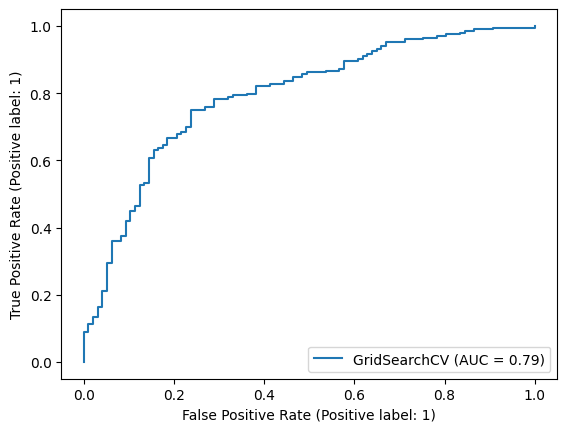

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve

plot_roc_curve(model_grid_adaboost, X_test, y_test)
plt.show()

plot_roc_curve(model_grid_xgboost, X_test, y_test)
plt.show()

In [24]:
y_pred_adab = model_grid_adaboost.best_estimator_.predict(X_test)
y_pred_xgb = model_grid_xgboost.best_estimator_.predict(X_test)

In [25]:
temp_data = pd.concat([pd.Series(y_pred_adab),pd.Series(y_pred_xgb)],axis=1)

In [26]:
temp_data.columns = ['Ada','XGB']
temp_data

,Ada,XGB
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
295,1,0
296,1,1
297,1,1
298,1,1


In [21]:
xgb = XGBClassifier(eval_metric='mlogloss',use_label_encoder=False)
xgb.fit(temp_data,y_test)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [27]:
y_pred_staking = xgb.predict(temp_data)

C:\Users\신주현\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


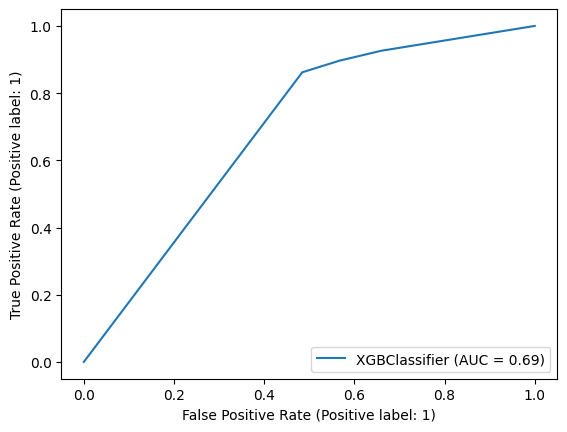

In [28]:
plot_roc_curve(xgb, temp_data,y_test)